In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor


#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('C:\\Users\\santu\\OneDrive\\Desktop\\Woodland_All.csv')
df

,Brand,Name,Category,Colors,Price,Sizes,Count_Sizes,Color_Name,product_Code,Review,Rating,Features,Comfort
0,Woodland,Navy Boot For Men,Men,4,5 995,7,"['39', '40', '41', '42', '43', '44', '45']",NAVY,FGC015050091A,NaN,NaN,This durable walking boot is built for comfort...,Nubuck Sole - Rubber Insole - Full Aero Cat
1,Woodland,Camel Nubuk Oily Polished Mens Boot,Men,3,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0AA050061A,NaN,NaN,Head out in style and experience ultimate comf...,NaN
2,Woodland,Camel Boots For Men,Men,2,6 995,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0D4050181A,NaN,NaN,Durable outsole with grippy treads gears you f...,Leather
3,Woodland,Camel Boot For Men,Men,2,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC015050071A,NaN,NaN,Equipped for challenging conditions this camel...,Nubuck Rubber Sole
4,Woodland,Camel High Ankle Boot For Men,Men,2,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0H9050161A,NaN,NaN,The lace-up camel boot features a sturdy TPR o...,Milled Nubuck TPR outsole Full Insole
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Woodland,Cashew Brown Boot For Men,Men,2,3 371,3,"['40', '41', '43']",CASHEW BROWN,FGC015034851A,NaN,NaN,Take on the day with both style and comfort in...,Nubuck Outsole: Rubber/Phylon Insole: Rubberiz...
73,Woodland,Light Brown High-Top Sneaker For Men,Men,1,8 997,6,"['40', '41', '42', '43', '44', '45']",LBROWN,FGC0830T7062A,NaN,NaN,Elevate your everyday style with these nude co...,Synthetic Round-toe Gold detail
74,Woodland,Khaki Hiking Shoes,Men,2,2 577,5,"['41', '42', '43', '44', '45']",KHAKI,FGC0900R8001Z,NaN,NaN,Robust and rugged pair of casual outdoor activ...,Robust and rugged pair of casual outdoor activ...
75,Woodland,Snaype High-Top Boots,Men,2,3 997,4,"['39', '40', '41', '43']",SNAYPE,FGC051027561A,NaN,NaN,Sturdy pair of high-top boots in snaype colour...,Suede finish High-top D-ring rust-proof eyelet...


In [20]:
df.head()

,Brand,Name,Category,Colors,Price,Sizes,Count_Sizes,Color_Name,product_Code,Review,Rating,Features,Comfort
0,Woodland,Navy Boot For Men,Men,4,5 995,7,"['39', '40', '41', '42', '43', '44', '45']",NAVY,FGC015050091A,NaN,NaN,This durable walking boot is built for comfort...,Nubuck Sole - Rubber Insole - Full Aero Cat
1,Woodland,Camel Nubuk Oily Polished Mens Boot,Men,3,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0AA050061A,NaN,NaN,Head out in style and experience ultimate comf...,NaN
2,Woodland,Camel Boots For Men,Men,2,6 995,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0D4050181A,NaN,NaN,Durable outsole with grippy treads gears you f...,Leather
3,Woodland,Camel Boot For Men,Men,2,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC015050071A,NaN,NaN,Equipped for challenging conditions this camel...,Nubuck Rubber Sole
4,Woodland,Camel High Ankle Boot For Men,Men,2,6 495,7,"['39', '40', '41', '42', '43', '44', '45']",CAMEL,FGC0H9050161A,NaN,NaN,The lace-up camel boot features a sturdy TPR o...,Milled Nubuck TPR outsole Full Insole


In [21]:
df.dtypes

Brand            object
Name             object
Category         object
Colors            int64
Price            object
Sizes             int64
Count_Sizes      object
Color_Name       object
product_Code     object
Review          float64
Rating          float64
Features         object
Comfort          object
dtype: object

In [24]:
df.describe()

,Colors,Sizes,Review,Rating
count,77.000000,77.000000,0.0,0.0
mean,2.207792,5.220779,NaN,NaN
std,0.863555,2.387596,NaN,NaN
min,1.000000,0.000000,NaN,NaN
25%,2.000000,4.000000,NaN,NaN
50%,2.000000,7.000000,NaN,NaN
75%,3.000000,7.000000,NaN,NaN
max,5.000000,7.000000,NaN,NaN


In [25]:
df.isnull().sum()

Brand            0
Name             0
Category         0
Colors           0
Price            0
Sizes            0
Count_Sizes      0
Color_Name       0
product_Code     0
Review          77
Rating          77
Features         0
Comfort          2
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         77 non-null     object 
 1   Name          77 non-null     object 
 2   Category      77 non-null     object 
 3   Colors        77 non-null     int64  
 4   Price         77 non-null     object 
 5   Sizes         77 non-null     int64  
 6   Count_Sizes   77 non-null     object 
 7   Color_Name    77 non-null     object 
 8   product_Code  77 non-null     object 
 9   Review        0 non-null      float64
 10  Rating        0 non-null      float64
 11  Features      77 non-null     object 
 12  Comfort       75 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ KB


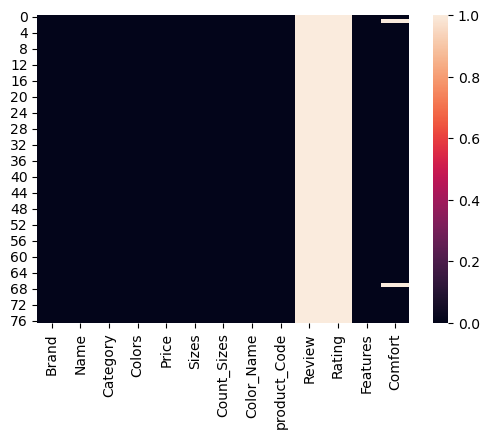

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

In [28]:
df['Comfort'].fillna(df['Comfort'].mode()[0],inplace=True)


In [29]:
df.drop(['Review', 'Rating'], axis=1, inplace=True)

In [30]:
df.isnull().sum()

Brand           0
Name            0
Category        0
Colors          0
Price           0
Sizes           0
Count_Sizes     0
Color_Name      0
product_Code    0
Features        0
Comfort         0
dtype: int64

In [31]:
df['Price'].value_counts()

Price
7 995     9
6 495     8
3 597     7
11 995    5
3 897     4
14 995    4
6 995     3
4 295     3
3 497     3
5 995     2
3 297     2
15 995    2
4 197     2
3 000     2
13 995    2
12 995    2
9 995     1
2 937     1
2 577     1
8 997     1
3 371     1
4 695     1
2 877     1
3 177     1
2 697     1
1 500     1
2 997     1
3 895     1
16 995    1
2 817     1
2 297     1
2 500     1
3 997     1
Name: count, dtype: int64

In [32]:
df['Price'] = df['Price'].replace({' ': '', "'": '',",":''}, regex=True)

In [33]:
df['Price'].unique()

array(['5995', '6495', '6995', '3895', '4295', '7995', '3597', '12995',
       '11995', '13995', '3497', '2997', '9995', '3297', '14995', '3897',
       '3000', '4197', '2500', '2297', '2817', '16995', '15995', '2697',
       '1500', '2937', '3177', '2877', '4695', '3371', '8997', '2577',
       '3997'], dtype=object)

In [34]:
df['Price'] = df['Price'].astype(float)

In [36]:
pd.crosstab(df['Price'], df['Name'])

Name,Beige Chelsea Boot For Men,Black Boot For Men,Black Boots For Men,Black Chelsea Boot For Men,Brawny GREY,Brown Boot For Men,Brown Boots For Men,Brown Chelsea Boot For Men,Brown Chukka Boots,CADET BLUE Hiking Shoes,...,Tan Leather Chukka Boot For Men,Voyage LGREEN,Wayfarer SNAYPE,Woodland CAMEL Trekking Casual Shoes,Woodland Camel Trekking Shoes,Woodland Dnavy M27 Trekking Boots,Woodland OLIVE Hiking Boots,Woodland Olive Green Trekking Casual Shoes,Woodland RUST BROWN Hiking Shoes,Woodland SNAYPE Hiking Boots
Price,,,,,,,,,,,,,,,,,,,,,
1500.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2297.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2500.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2577.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2697.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2817.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2877.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2937.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
le = LabelEncoder()

#Iterate over Categorical columns
for i in df:
    df[i] = le.fit_transform(df[i])
df.head()

,Brand,Name,Category,Colors,Price,Sizes,Count_Sizes,Color_Name,product_Code,Features,Comfort
0,0,41,0,3,21,7,0,19,11,71,30
1,0,18,0,2,22,7,0,5,36,24,12
2,0,14,0,1,23,7,0,5,44,13,12
3,0,13,0,1,22,7,0,5,10,18,27
4,0,15,0,1,22,7,0,5,48,68,17


In [39]:
df_cor = df.corr()
df_cor

,Brand,Name,Category,Colors,Price,Sizes,Count_Sizes,Color_Name,product_Code,Features,Comfort
Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,NaN,1.000000,NaN,0.353924,-0.349229,-0.380066,0.417657,0.833791,-0.223845,0.211921,0.045867
Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colors,NaN,0.353924,NaN,1.000000,-0.435520,-0.577750,0.582910,0.203182,-0.053124,0.186228,0.070236
Price,NaN,-0.349229,NaN,-0.435520,1.000000,0.645183,-0.621325,-0.210960,0.152593,-0.167003,-0.185233
Sizes,NaN,-0.380066,NaN,-0.577750,0.645183,1.000000,-0.936719,-0.218266,0.189184,-0.149199,-0.054093
Count_Sizes,NaN,0.417657,NaN,0.582910,-0.621325,-0.936719,1.000000,0.256414,-0.166893,0.053223,0.060226
Color_Name,NaN,0.833791,NaN,0.203182,-0.210960,-0.218266,0.256414,1.000000,-0.225850,0.158024,0.033209
product_Code,NaN,-0.223845,NaN,-0.053124,0.152593,0.189184,-0.166893,-0.225850,1.000000,-0.144853,-0.269028
Features,NaN,0.211921,NaN,0.186228,-0.167003,-0.149199,0.053223,0.158024,-0.144853,1.000000,0.055180


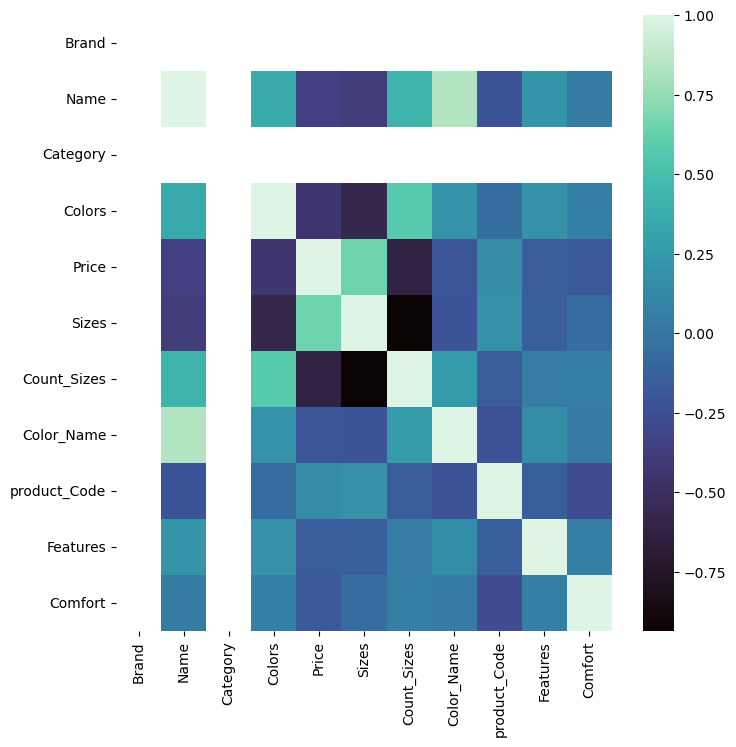

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 8})
plt.show()

In [41]:
X = df.drop(['Price'], axis =1)
Y = df['Price']

In [42]:
X.shape, Y.shape

((77, 10), (77,))

In [43]:
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

,Brand,Name,Category,Colors,Sizes,Count_Sizes,Color_Name,product_Code,Features,Comfort
0,0.0,0.668849,0.0,2.088992,0.750080,-0.751231,0.764123,-1.214787,1.578410,0.482905
1,0.0,-0.536168,0.0,0.923395,0.750080,-0.751231,-0.758473,-0.089984,-0.603510,-0.809192
2,0.0,-0.745736,0.0,-0.242202,0.750080,-0.751231,-0.758473,0.269953,-1.114172,-0.809192
3,0.0,-0.798128,0.0,-0.242202,0.750080,-0.751231,-0.758473,-1.259780,-0.882053,0.267555
4,0.0,-0.693344,0.0,-0.242202,0.750080,-0.751231,-0.758473,0.449921,1.439139,-0.450276
...,...,...,...,...,...,...,...,...,...,...
72,0.0,-0.483776,0.0,-0.242202,-0.936231,0.410311,-0.649716,-1.484740,1.392715,0.123989
73,0.0,0.511673,0.0,-1.407799,0.328502,0.178003,0.329095,-0.449921,-1.021324,1.631435
74,0.0,0.354497,0.0,-0.242202,-0.093076,0.874928,0.220339,-0.359937,0.185695,0.985387
75,0.0,1.192769,0.0,-0.242202,-0.514653,-0.286614,1.742934,-0.674882,1.207020,1.487869


In [44]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,NaN,Brand
1,4.019598,Name
2,NaN,Category
3,1.637915,Colors
4,9.127092,Sizes
5,9.490058,Count_Sizes
6,3.468903,Color_Name
7,1.185519,product_Code
8,1.184794,Features
9,1.086542,Comfort


In [45]:
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [48]:
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()

ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]

In [49]:
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X_scale, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

,Model,Best R2 Score,Best Random State,MSE,MAE
10,AdaBoostRegressor,0.768292,73,11.994994,2.641704
8,Bagging Regressor,0.758182,34,15.115000,3.175000
9,GradientBoostingRegressor,0.745607,73,13.245228,2.710591
6,RandomForest,0.703978,95,16.377606,3.076875
5,KNeighbors,0.662305,69,11.307500,2.762500
0,Linear Regression,0.655433,68,14.319706,3.150085
1,Ridge,0.651675,68,14.475878,3.148235
7,SGDRegressor,0.643171,68,14.546258,3.137762
2,Lasso,0.635085,72,20.794445,3.472763
3,Decision Tree,0.620287,92,29.000000,4.125000


In [50]:
sorted_results_df.head(2)

,Model,Best R2 Score,Best Random State,MSE,MAE
10,AdaBoostRegressor,0.768292,73,11.994994,2.641704
8,Bagging Regressor,0.758182,34,15.115000,3.175000


In [54]:
X1 = df.drop(['Comfort'], axis =1)
Y1 = df['Comfort']

# Checking the dimenstion of X & Y
X1.shape, Y1.shape

((77, 10), (77,))

In [55]:
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

In [56]:
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    
    for random_state in range(1, 101):  # Try different random states
        cross_val_scores = cross_val_score(model, X1, Y1, cv=5)
        mean_accuracy = np.mean(cross_val_scores)

        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            
    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)
    
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X1, Y1, cv=5)
    best_cv_score = cv_scores.mean()
    
    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 1
Accuracy: 0.4375
Precision: 0.4375
Recall: 0.4375
F1-Score: 0.43750000000000006
Support: 16
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Cross-Validation Score: 0.22166666666666662
Model: Decision Tree Classifier
Best Random State: 1
Accuracy: 0.4375
Precision: 0.5625
Recall: 0.4375
F1-Score: 0.4861111111111111
Support: 16
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
8,AdaBoostClassifier,1,0.5625,0.508333,0.5625,0.511706,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0,..."
4,ExtraTrees Classifier,1,0.5000,0.531250,0.5000,0.500000,16.0,"[[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,Logistic Regression,1,0.4375,0.437500,0.4375,0.437500,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,Decision Tree Classifier,1,0.4375,0.562500,0.4375,0.486111,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
5,RidgeClassifier,1,0.4375,0.285714,0.4375,0.343750,16.0,"[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
7,BaggingClassifier,1,0.4375,0.343750,0.4375,0.384091,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,Random Forest Classifier,1,0.3750,0.343750,0.3750,0.354167,16.0,"[[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,K-Neighbors Classifier,1,0.3125,0.209821,0.3125,0.250000,16.0,"[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,..."
6,SGDClassifier,1,0.0000,0.000000,0.0000,0.000000,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [57]:
model_performance_df.head(2)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
8,AdaBoostClassifier,1,0.5625,0.508333,0.5625,0.511706,16.0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0,..."
4,ExtraTrees Classifier,1,0.5000,0.531250,0.5000,0.500000,16.0,"[[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [58]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=67, test_size=0.20)

# Define the hyperparameter grid to search for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object for Random Forest Regressor
random_search_rf = RandomizedSearchCV(RandomForestRegressor(), 
                                      param_distributions=param_grid_rf, 
                                      n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for Random Forest Regressor
random_search_rf.fit(train_x, train_y)
# Get the best hyperparameters for Random Forest Regressor
best_params_rf = random_search_rf.best_params_

# Create a regressor with the best parameters for Random Forest Regressor
best_rf = RandomForestRegressor(**best_params_rf)

# Perform cross-validation to calculate the R-squared score for Random Forest Regressor
cv_scores_rf = cross_val_score(best_rf, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for Random Forest Regressor
best_rf.fit(train_x, train_y)

# Make predictions on the test data for Random Forest Regressor
y_pred_rf = best_rf.predict(test_x)

# Evaluate the best model for Random Forest Regressor
r2_score_rf = r2_score(test_y, y_pred_rf)
print('Best R-squared Score (Random Forest):', r2_score_rf)

mse_rf = mean_squared_error(test_y, y_pred_rf)
print('Mean Squared Error (MSE) (Random Forest):', mse_rf)

mae_rf = mean_absolute_error(test_y, y_pred_rf)
print('Mean Absolute Error (MAE) (Random Forest):', mae_rf)

# Print cross-validated R-squared scores for Random Forest Regressor
print('Cross-Validated R-squared Scores (Random Forest):', cv_scores_rf.mean())

Best R-squared Score (Random Forest): -0.5036933086583164
Mean Squared Error (MSE) (Random Forest): 36.816990854180965
Mean Absolute Error (MAE) (Random Forest): 4.042155416582931
Cross-Validated R-squared Scores (Random Forest): 0.2289038813045309


In [59]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=58, test_size=0.20)

# Define the hyperparameter grid to search for Bagging Regressor
param_grid_bagging = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
}

# Create a RandomizedSearchCV object for Bagging Regressor
random_search_bagging = RandomizedSearchCV(BaggingRegressor(), 
                                           param_distributions=param_grid_bagging, 
                                           n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for Bagging Regressor
random_search_bagging.fit(train_x, train_y)
# Get the best hyperparameters for Bagging Regressor
best_params_bagging = random_search_bagging.best_params_

# Create a regressor with the best parameters for Bagging Regressor
best_bagging = BaggingRegressor(**best_params_bagging)

# Perform cross-validation to calculate the R-squared score for Bagging Regressor
cv_scores_bagging = cross_val_score(best_bagging, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for Bagging Regressor
best_bagging.fit(train_x, train_y)

# Make predictions on the test data for Bagging Regressor
y_pred_bagging = best_bagging.predict(test_x)

# Evaluate the best model for Bagging Regressor
r2_score_bagging = r2_score(test_y, y_pred_bagging)
print('Best R-squared Score (Bagging Regressor):', r2_score_bagging)

mse_bagging = mean_squared_error(test_y, y_pred_bagging)
print('Mean Squared Error (MSE) (Bagging Regressor):', mse_bagging)

mae_bagging = mean_absolute_error(test_y, y_pred_bagging)
print('Mean Absolute Error (MAE) (Bagging Regressor):', mae_bagging)

# Print cross-validated R-squared scores for Bagging Regressor
print('Cross-Validated R-squared Scores (Bagging Regressor):', cv_scores_bagging.mean())

Best R-squared Score (Bagging Regressor): 0.6455249156746459
Mean Squared Error (MSE) (Bagging Regressor): 22.98410908092404
Mean Absolute Error (MAE) (Bagging Regressor): 3.641041666666667
Cross-Validated R-squared Scores (Bagging Regressor): 0.2579801366305413


In [63]:
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_et = RandomizedSearchCV(estimator=ExtraTreesClassifier(), param_distributions=param_grid_et,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_et.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_et = random_search_et.best_params_

# Create a classifier with the best parameters
best_et = ExtraTreesClassifier(**best_params_et)

# Fit the best classifier on the training data
best_et.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_et = best_et.predict(X_test)

# Evaluate the best model
accuracy_et = accuracy_score(Y_test, Y_pred_et)
precision_et = precision_score(Y_test, Y_pred_et, average='weighted')
recall_et = recall_score(Y_test, Y_pred_et, average='weighted')

classification_report_et = classification_report(Y_test, Y_pred_et)
conf_matrix_et = confusion_matrix(Y_test, Y_pred_et)

print("Best Accuracy (ExtraTrees):", accuracy_et)
print("Precision (ExtraTrees):", precision_et)
print("Recall (ExtraTrees):", recall_et)

print("Classification Report (ExtraTrees):\n", classification_report_et)
print("Confusion Matrix (ExtraTrees):\n", conf_matrix_et)

Best Accuracy (ExtraTrees): 0.4375
Precision (ExtraTrees): 0.3541666666666667
Recall (ExtraTrees): 0.4375
Classification Report (ExtraTrees):
               precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.83      1.00      0.91         5
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.50      0.50      0.50         2
          24       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          36       0.50      1.00      0.67         1
          37       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2

    accuracy                           0.44  

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=80)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid_rf,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_rf.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params_rf)

# Fit the best classifier on the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf, average='weighted')
recall_rf = recall_score(Y_test, Y_pred_rf, average='weighted')

classification_report_rf = classification_report(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Best Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)

print("Classification Report (Random Forest):\n", classification_report_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Best Accuracy (Random Forest): 0.1875
Precision (Random Forest): 0.12708333333333333
Recall (Random Forest): 0.1875
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          12       0.33      1.00      0.50         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.50      0.33      0.40         3
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          39       0.00      0.00

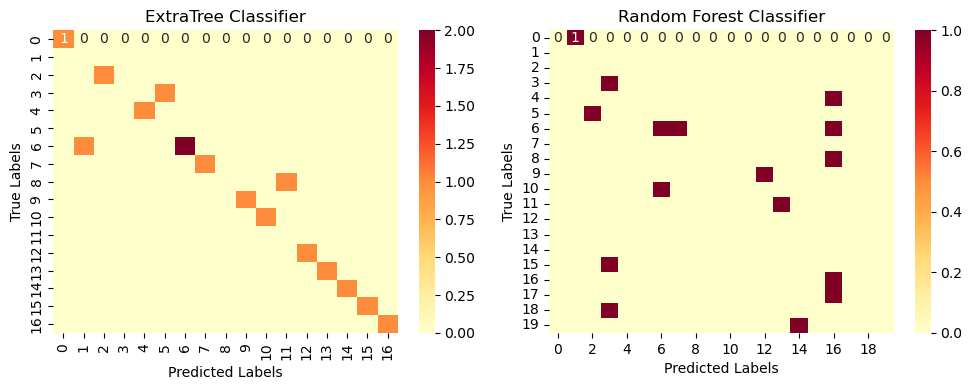

In [66]:
Y_pred_et = best_et.predict(X_test)

# Get predicted labels for RandomForestClassifier
Y_pred_rf = best_rf.predict(X_test)

# Ensure the lengths of Y_test and predictions are consistent
Y_test = Y_test[:len(Y_pred_et)]
Y_pred_et = Y_pred_et[:len(Y_test)]
Y_pred_rf = Y_pred_rf[:len(Y_test)]

# Now you can proceed to calculate the confusion matrices
cm_et = confusion_matrix(Y_test, Y_pred_et)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot ExtraTree Classifier Confusion Matrix
sns.heatmap(cm_et, annot=True, fmt="d", cmap="YlOrRd", ax=axes[0])
axes[0].set_title('ExtraTree Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()